15/11/2023 Terri Hoare




## Python Libraries


In [ ]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats


import matplotlib.pyplot as plt
# special matplotlib argument for improved plots
from matplotlib import rcParams
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")


import statsmodels.api as sm
import sklearn

## Read in FIREDAM data

In [ ]:
firedam = pd.read_csv('FIREDAM.CSV')

In [ ]:
type(firedam)

pandas.core.frame.DataFrame

In [ ]:
firedam.shape

(15, 2)

In [ ]:
# Print column names
firedam.columns.values

array(['DISTANCE', 'DAMAGE'], dtype=object)

In [ ]:
# Print description of Boston housing data set
firedam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DISTANCE  15 non-null     float64
 1   DAMAGE    15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


Now let's explore the data set itself.

In [ ]:
firedam.head()


,DISTANCE,DAMAGE
0,3.4,26.2
1,1.8,17.8
2,4.6,31.3
3,2.3,23.1
4,3.1,27.5


In [ ]:
firedam['DAMAGE']


0     26.2
1     17.8
2     31.3
3     23.1
4     27.5
5     36.0
6     14.1
7     22.3
8     19.6
9     31.3
10    24.0
11    17.3
12    43.2
13    36.4
14    26.1
Name: DAMAGE, dtype: float64

## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns.

In [ ]:
firedam.describe()

,DISTANCE,DAMAGE
count,15.000000,15.000000
mean,3.280000,26.413333
std,1.576252,8.068976
min,0.700000,14.100000
25%,2.200000,20.950000
50%,3.100000,26.100000
75%,4.450000,31.300000
max,6.100000,43.200000


### Scatter plots
***

Let's look at some scatter plots for three variables: 'CRIM', 'RM' and 'PTRATIO'.

What kind of relationship do you see? e.g. positive, negative?  linear? non-linear?

Text(0.5, 1.0, 'Relationship between Distance and Damage')

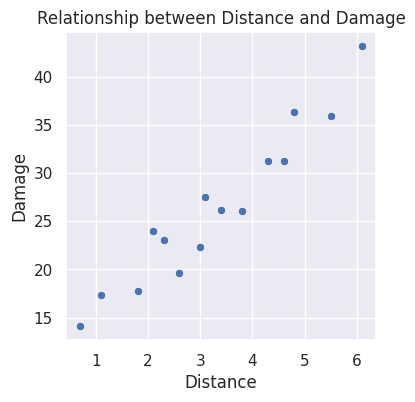

In [ ]:
sns.set(rc={'figure.figsize':(4,4)})
sns.scatterplot(data=firedam, x="DISTANCE", y="DAMAGE")
plt.xlabel("Distance")
plt.ylabel("Damage")
plt.title("Relationship between Distance and Damage")

<Axes: xlabel='DISTANCE', ylabel='DAMAGE'>

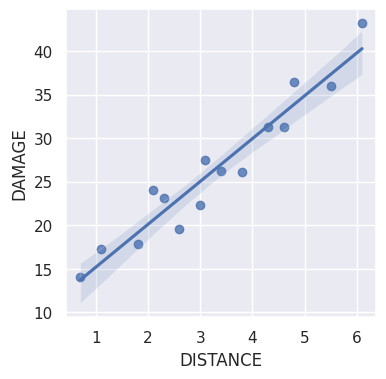

In [ ]:
# We can also use seaborn regplot for this
#  This provides automatic linear regression fits (useful for data exploration later on)

sns.regplot(y="DAMAGE", x="DISTANCE", data=firedam, fit_reg = True)

### Histograms
***


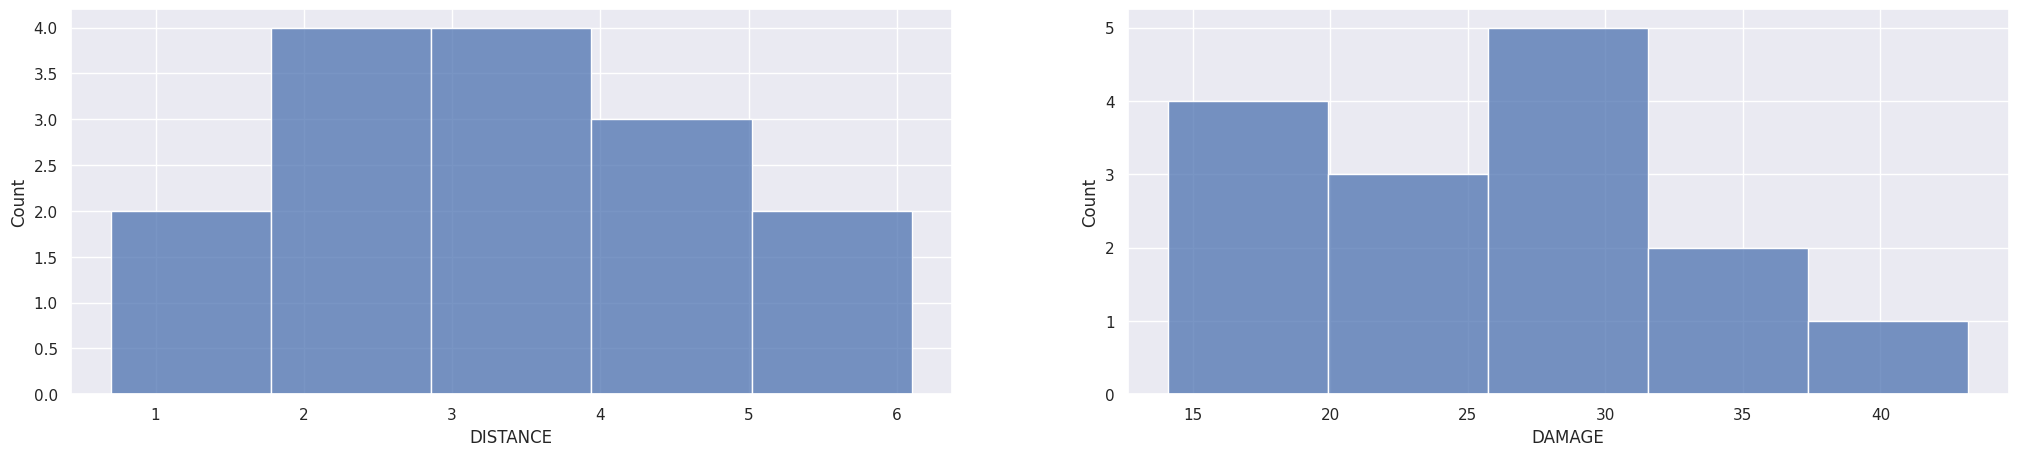

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(25,5))
for i, col in enumerate(["DISTANCE","DAMAGE"]):
  sns.histplot(data=firedam,
                x=col,
                ax=ax[i])


### Boxplots
***

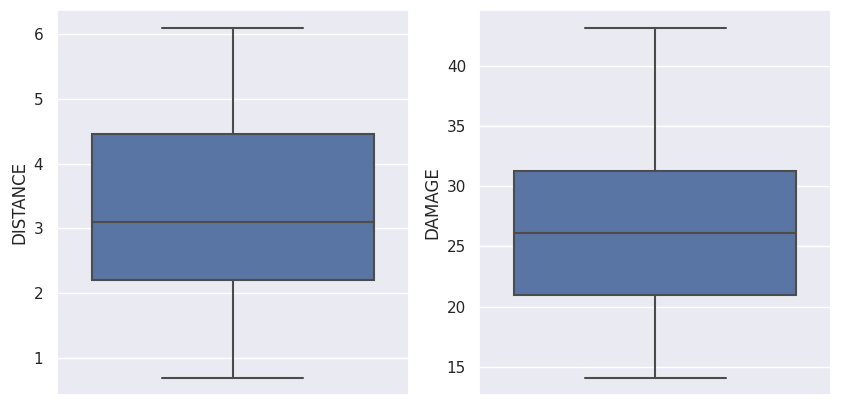

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
for i, col in enumerate(["DISTANCE","DAMAGE"]):
  sns.boxplot(data=firedam, y=col,
                ax=ax[i],)


## Simple Linear regression with FIREDAM data***

Here,

$Y$ = DAMAGE (also called "target" data in python)

and

$X$ = DISTANCE (or independent variable)

which we will use to fit a linear regression model and predict fire damage. We will use the least squares method as the way to estimate the coefficients.  

We'll use two ways of fitting a linear regression using statsmodels or sklearn. The first is recommended but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***

In [ ]:
# Import regression modules
# ols - stands for Ordinary least squares, we'll use this
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
from statsmodels.base.model import Model
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
model = ols('DAMAGE ~ DISTANCE', firedam).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 DAMAGE   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     156.9
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.25e-08
Time:                        15:38:31   Log-Likelihood:                -32.811
No. Observations:                  15   AIC:                             69.62
Df Residuals:                      13   BIC:                             71.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2779      1.420      7.237      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
model.fittedvalues

0     27.003653
1     19.132724
2     32.906850
3     21.592389
4     25.527854
5     37.334248
6     13.721460
7     25.035921
8     23.068188
9     31.431051
10    20.608523
11    15.689192
12    40.285846
13    33.890716
14    28.971385
dtype: float64

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), bbut you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex, for a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


### Linear Result Analysis

In [ ]:
print ('R**2 is ', model.rsquared)
print ('MSE Residual is ', model.mse_resid)
print ('Residual Standard Error is ', model.mse_resid**0.5)

R**2 is  0.9234781689805285
MSE Residual is  5.365459642511738
Residual Standard Error is  2.3163461836503925


### Residual analysis

RESIDUAL ANALYSIS
 
count    1.500000e+01
mean    -3.789561e-15
std      2.232087e+00
min     -3.468188e+00
25%     -1.470549e+00
50%     -1.310507e-01
75%      1.791477e+00
max      3.391477e+00
dtype: float64


<Axes: ylabel='Count'>

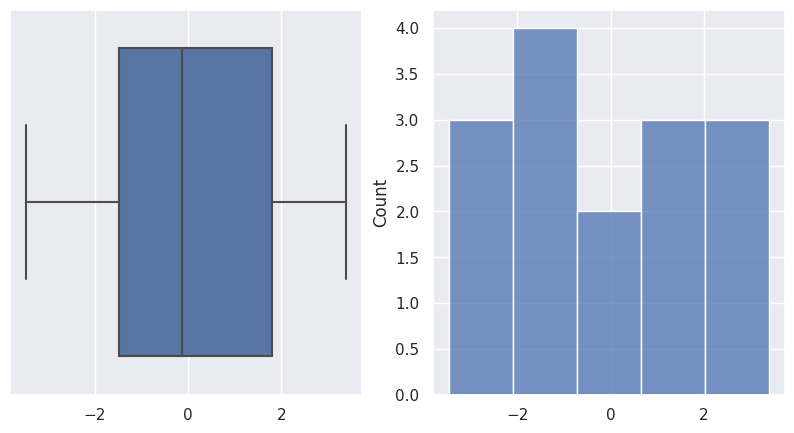

In [ ]:
print('RESIDUAL ANALYSIS')
print(' ')
print(model.resid.describe())
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=model.resid,  ax=ax[0],)
sns.histplot(x=model.resid,  ax=ax[1],)




### Fitting Linear Regression using `sklearn`

In [ ]:
from sklearn.linear_model import LinearRegression
X = firedam.drop("DAMAGE", axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression()

#### What can you do with a LinearRegression object?



In [ ]:
# fit a model
lm.fit(X, firedam.DAMAGE)

LinearRegression()

In [ ]:
# inspect the coefficients and intercept
print(lm.coef_, lm.intercept_)
pd.DataFrame(zip(X.columns, lm.coef_), columns = ['features', 'estimatedCoefficients'])

[4.91933073] 10.277928549524692


,features,estimatedCoefficients
0,DISTANCE,4.919331


In [ ]:
#predict using the fitted model
# first five predicted prices
lm.predict(X)

array([27.00365302, 19.13272386, 32.90684989, 21.59238922, 25.5278538 ,
       37.33424755, 13.72146006, 25.03592073, 23.06818844, 31.43105067,
       20.60852308, 15.68919235, 40.28584598, 33.89071604, 28.97138531])

Text(0.5, 1.0, 'DAMAGE vs Predicted DAMAGE: $Y_i$ vs $\\hat{Y}_i$')

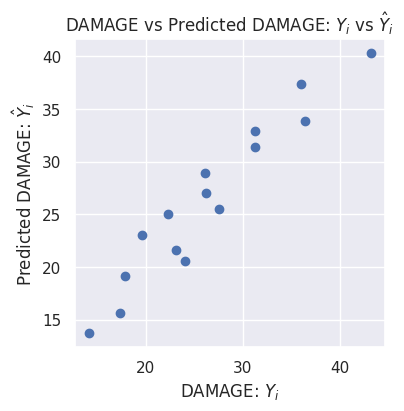

In [ ]:
plt.scatter(firedam.DAMAGE, lm.predict(X))
plt.xlabel("DAMAGE: $Y_i$")
plt.ylabel("Predicted DAMAGE: $\hat{Y}_i$")
plt.title("DAMAGE vs Predicted DAMAGE: $Y_i$ vs $\hat{Y}_i$")

In [ ]:
### Residual sum of squares

In [ ]:
print(np.sum(firedam.DAMAGE - lm.predict(X)) ** 2)

3.865418435582958e-27


#### Mean squared error

In [ ]:
mseFull = np.mean((firedam.DAMAGE - lm.predict(X)) ** 2)
print(mseFull)

4.650065023510172


We can also plot the fitted linear regression line.

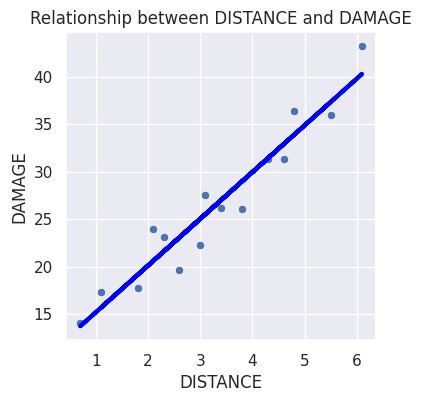

In [ ]:
sns.scatterplot(data=firedam, x="DISTANCE", y="DAMAGE")
plt.xlabel("DISTANCE")
plt.ylabel("DAMAGE")
plt.title("Relationship between DISTANCE and DAMAGE")

plt.plot(firedam.DISTANCE, lm.predict(X[['DISTANCE']]), color='blue', linewidth=3)
plt.show()